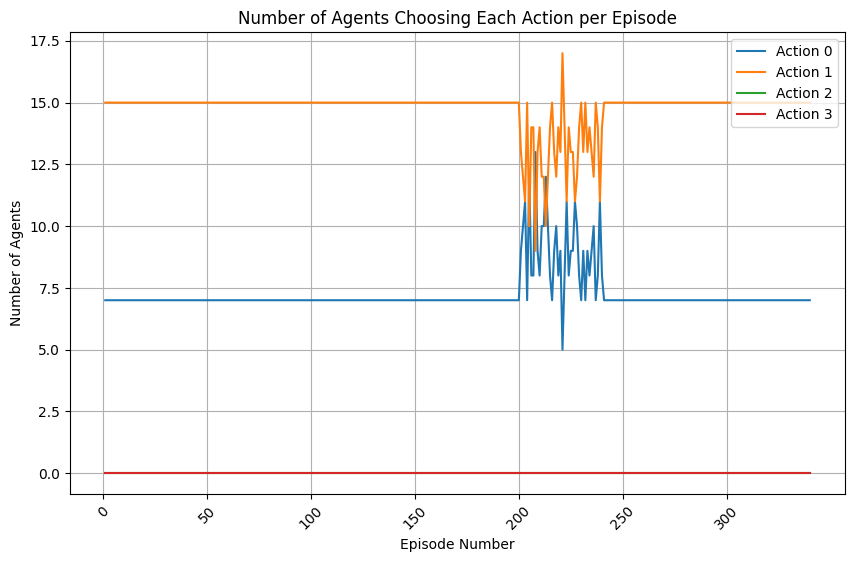

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Define the folder containing the CSV files
folder_path = "records/episodes"

# Initialize a dictionary to store action counts per episode
episode_action_counts = {}

# Regex pattern to extract episode number from filename
pattern = re.compile(r'ep(\d+)\.csv')

# Collect all episode files and sort them numerically
files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
files = sorted(files, key=lambda x: int(pattern.search(x).group(1)))

# Loop through sorted CSV files
for file in files:
    file_path = os.path.join(folder_path, file)
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Count occurrences of each action value (0,1,2,3)
    action_counts = df['action'].value_counts().to_dict()
    
    # Ensure all actions (0,1,2,3) are present in the dictionary
    episode_action_counts[file] = {action: action_counts.get(action, 0) for action in [0, 1, 2, 3]}

# Convert to DataFrame for easy plotting
action_df = pd.DataFrame.from_dict(episode_action_counts, orient="index")

# Convert index to sorted numeric episode numbers for correct x-axis labels
episode_numbers = [int(pattern.search(name).group(1)) for name in action_df.index]
action_df.index = episode_numbers
action_df = action_df.sort_index()

# Plot the data as a line chart
plt.figure(figsize=(10, 6))
for action in [0, 1, 2, 3]:
    plt.plot(action_df.index, action_df[action], marker="", label=f"Action {action}")

# Adjust x-axis labels to show 0, 50, 100, 150, etc.
plt.xlabel("Episode Number")
plt.ylabel("Number of Agents")
plt.title("Number of Agents Choosing Each Action per Episode")

# Set x-ticks at intervals of 50
x_ticks = list(range(0, max(action_df.index) + 1, 50))
plt.xticks(x_ticks, rotation=45)

plt.legend()
plt.grid(True)
plt.show()
